In [2]:
import mne
import matplotlib as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
mne.datasets.sample.data_path()

PosixPath('/Users/anshulchiranth/mne_data/MNE-sample-data')

In [5]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (
    sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif"
)
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/anshulchiranth/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Using matplotlib as 2D backend.


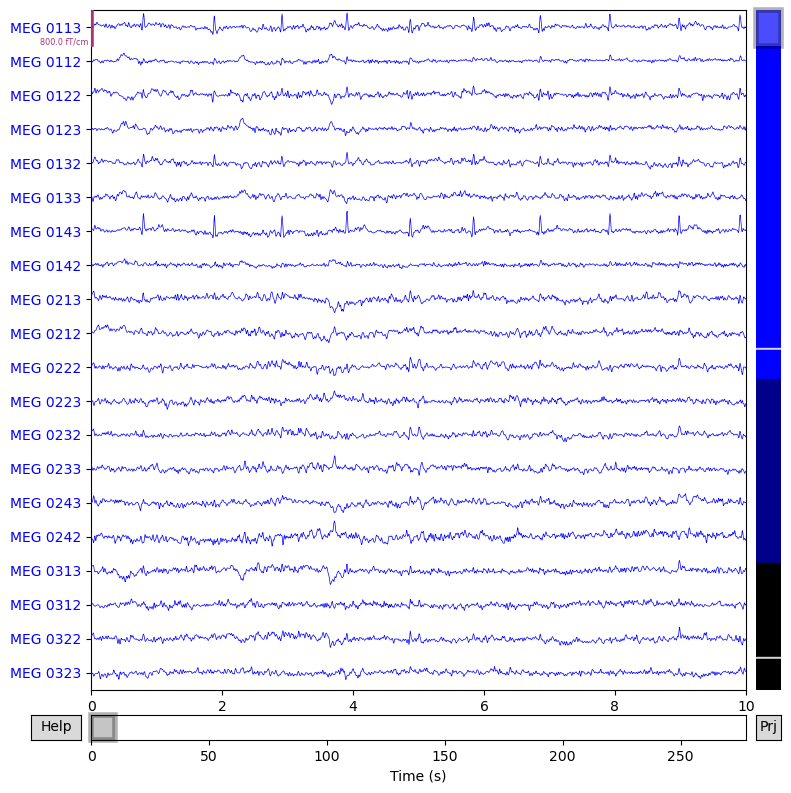

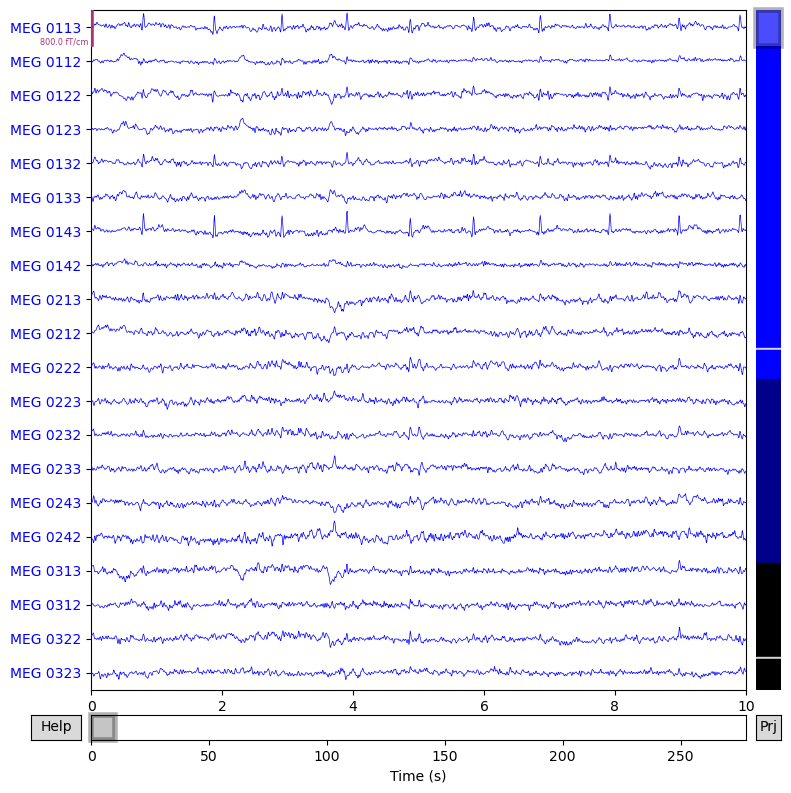

In [6]:
raw.plot()

In [7]:
raw.info

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

In [6]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [7]:
raw.info

<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>

In [7]:
ica.fit(raw.copy())

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 2.8s.


<ICA | raw data decomposition, method: fastica (fit in 33 iterations on 41700 samples), 20 ICA components (364 PCA components available), channel types: mag, grad, eeg, no sources marked for exclusion>

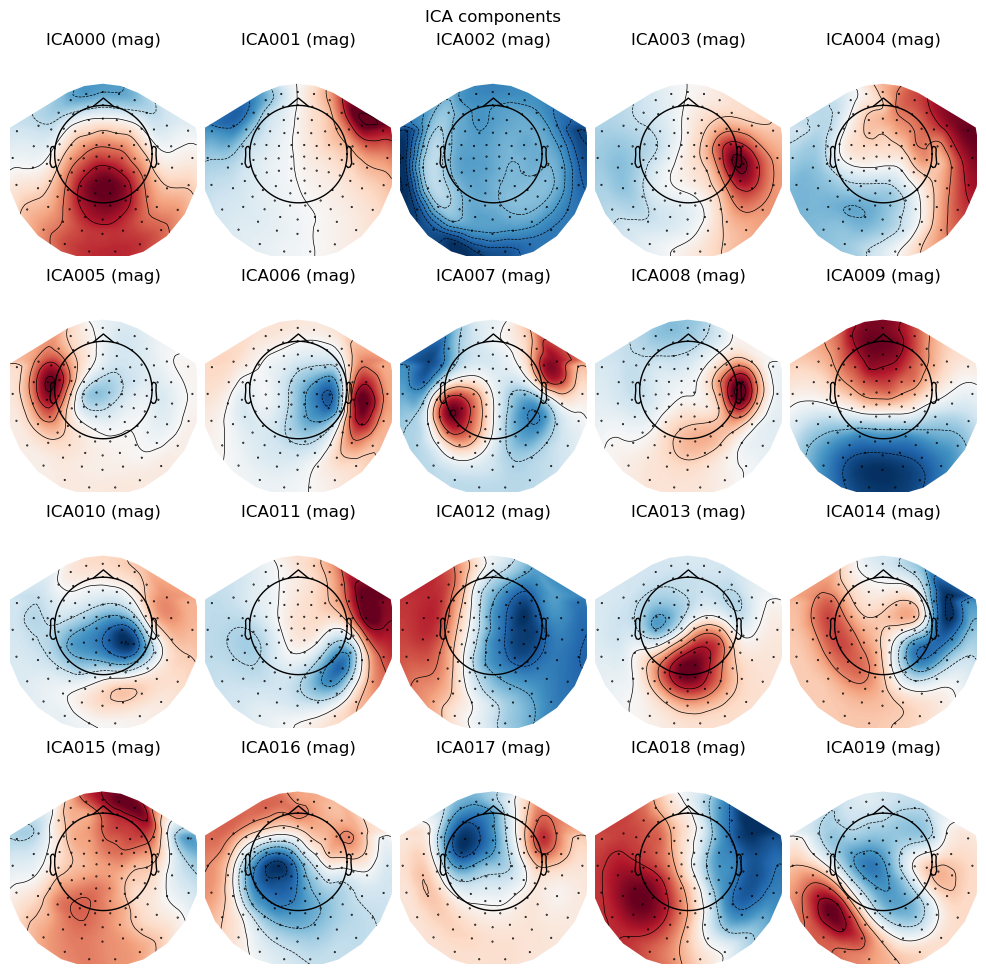

In [72]:
ica.plot_components();

In [9]:
events = mne.find_events(raw)

319 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


In [10]:
events

array([[ 6994,     0,     2],
       [ 7086,     0,     3],
       [ 7192,     0,     1],
       [ 7304,     0,     4],
       [ 7413,     0,     2],
       [ 7506,     0,     3],
       [ 7612,     0,     1],
       [ 7709,     0,     4],
       [ 7810,     0,     2],
       [ 7916,     0,     3],
       [ 8025,     0,     1],
       [ 8129,     0,     4],
       [ 8233,     0,     2],
       [ 8331,     0,     3],
       [ 8428,     0,     1],
       [ 8522,     0,     5],
       [ 8633,     0,     2],
       [ 8662,     0,    32],
       [ 8739,     0,     3],
       [ 8857,     0,     1],
       [ 8962,     0,     4],
       [ 9052,     0,     2],
       [ 9144,     0,     3],
       [ 9251,     0,     1],
       [ 9365,     0,     4],
       [ 9477,     0,     2],
       [ 9581,     0,     3],
       [ 9677,     0,     1],
       [ 9782,     0,     4],
       [ 9890,     0,     2],
       [ 9981,     0,     3],
       [10101,     0,     1],
       [10220,     0,     4],
       [10

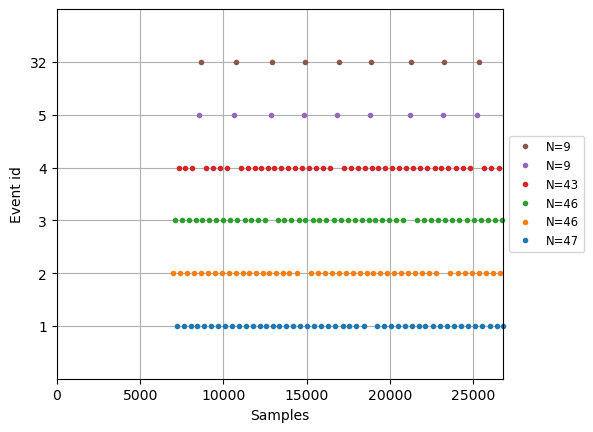

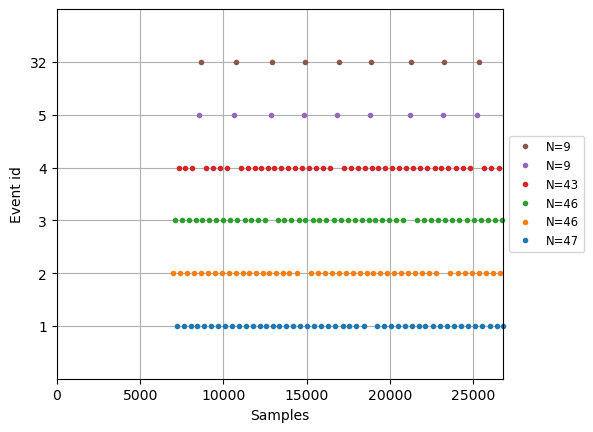

In [11]:
mne.viz.plot_events(events[:200])

In [12]:
epochs = mne.Epochs(raw, events)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated


Loading data for 319 events and 106 original time points ...
0 bad epochs dropped
Loading data for 20 events and 106 original time points ...


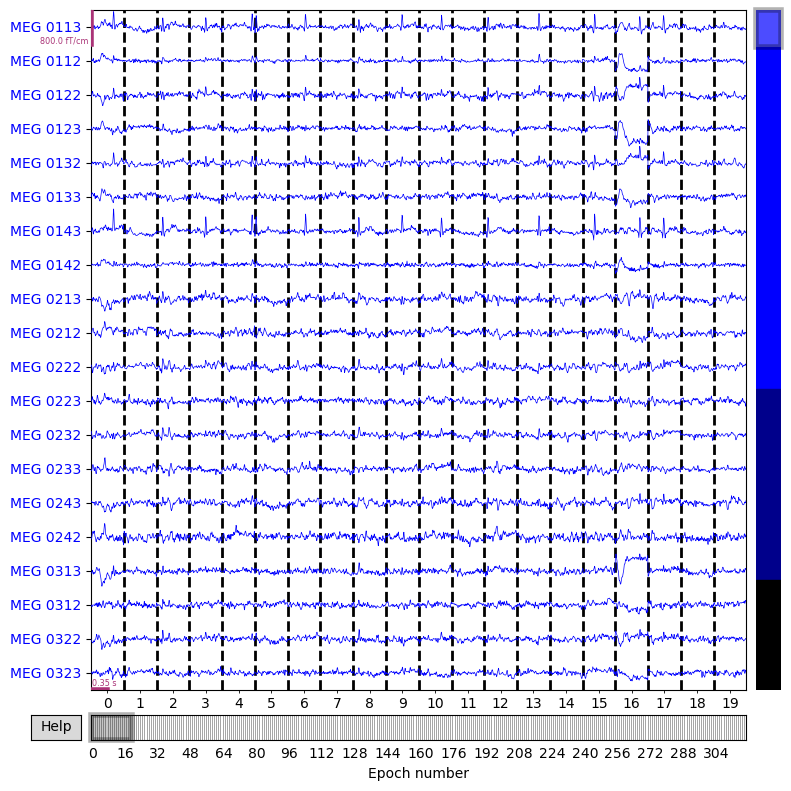

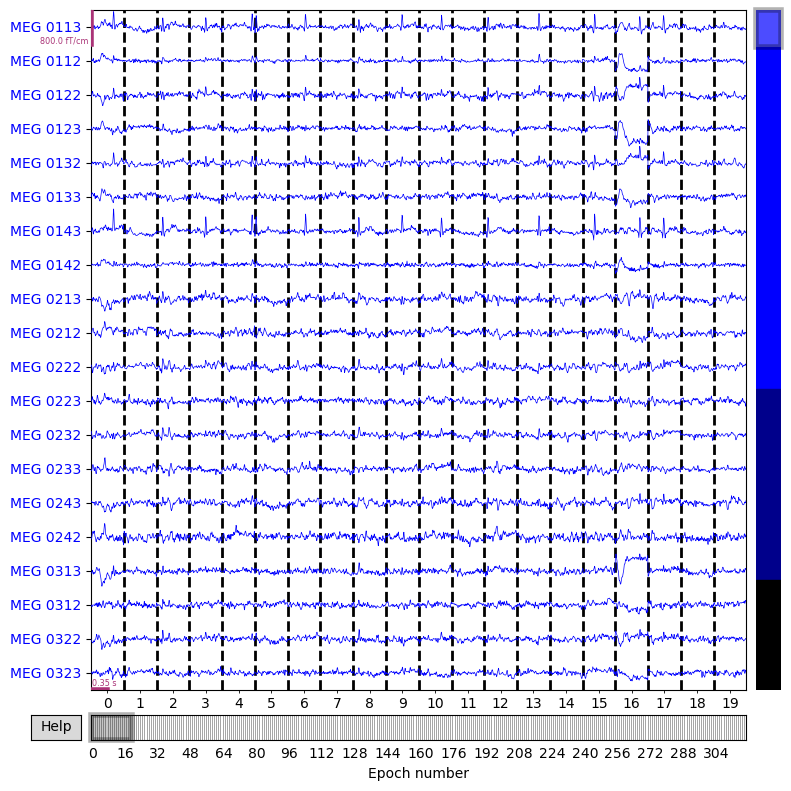

In [13]:
epochs.plot()

Loading data for 319 events and 106 original time points ...
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
319 matching events found
No baseline correction applied
0 projection items activated
combining channels using RMS (grad channels)
combining channels using RMS (mag channels)
combining channels using GFP (eeg channels)


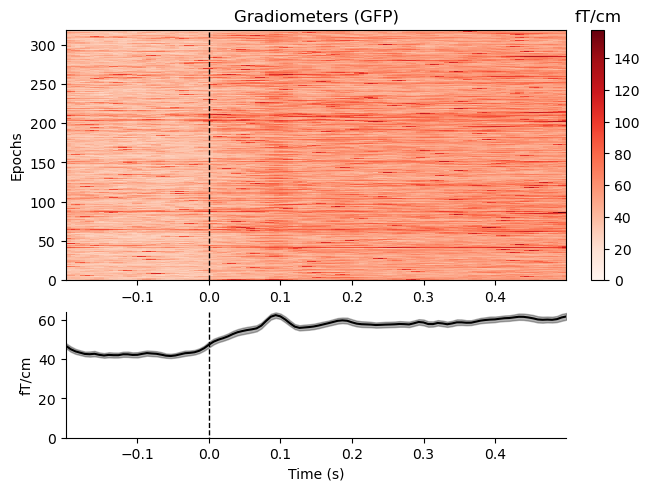

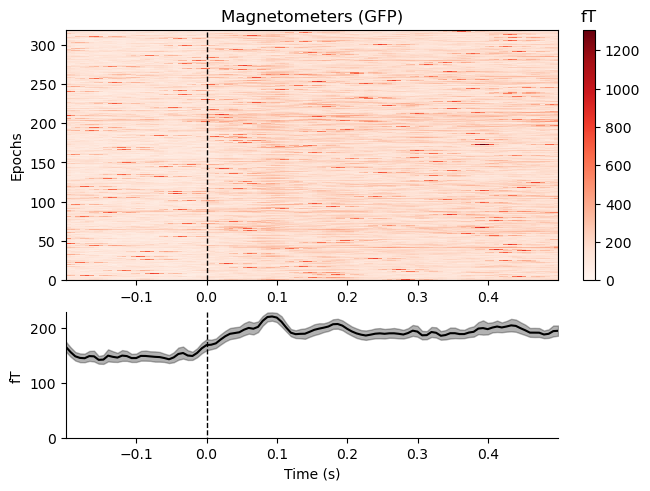

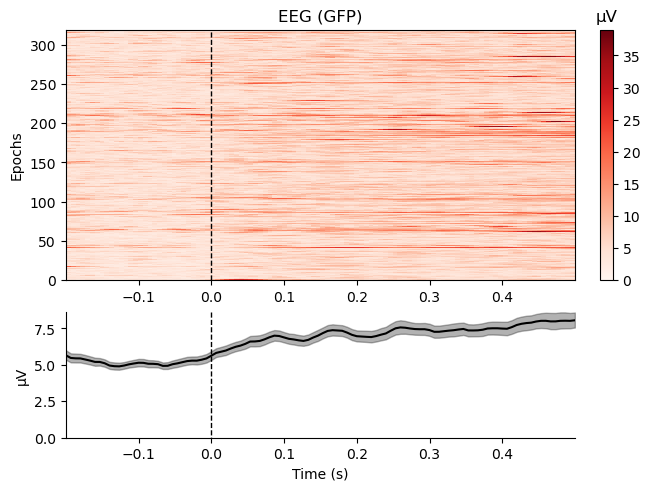

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [14]:
epochs.plot_image()

In [16]:
epochs

<Epochs | 319 events (all good), -0.2 – 0.499 s (baseline -0.2 – 0 s), ~3.2 MB, data not loaded,
 '1': 72
 '2': 73
 '3': 73
 '4': 70
 '5': 15
 '32': 16>

In [18]:
epochs.get_data().shape

Loading data for 319 events and 106 original time points ...


(319, 376, 106)

In [25]:
target = epochs["32"].average()
target

<Evoked | '32' (average, N=16), -0.1998 – 0.49949 s, baseline -0.199795 – 0 s, 366 ch, ~3.5 MB>

In [32]:
standard = epochs["1"].average()
standard

<Evoked | '1' (average, N=72), -0.1998 – 0.49949 s, baseline -0.199795 – 0 s, 366 ch, ~3.5 MB>

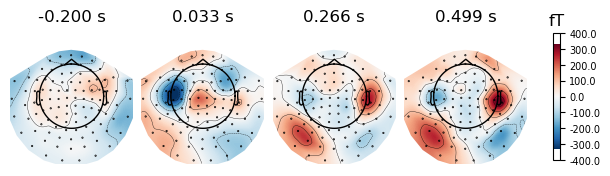

In [27]:
target.plot_topomap();

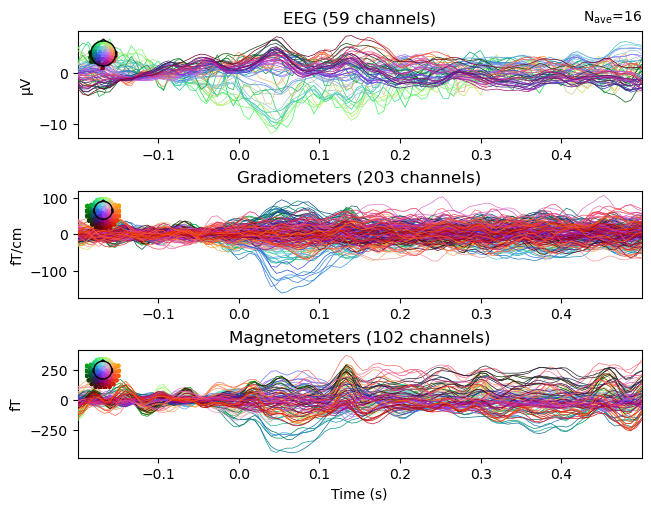

In [28]:
target.plot();

Projections have already been applied. Setting proj attribute to True.


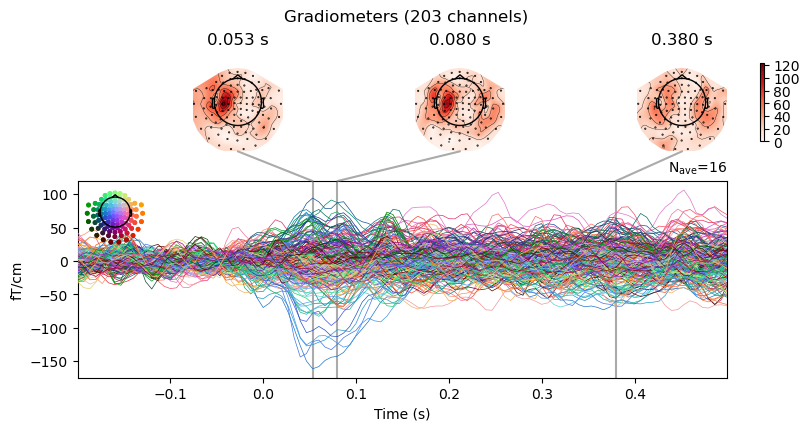

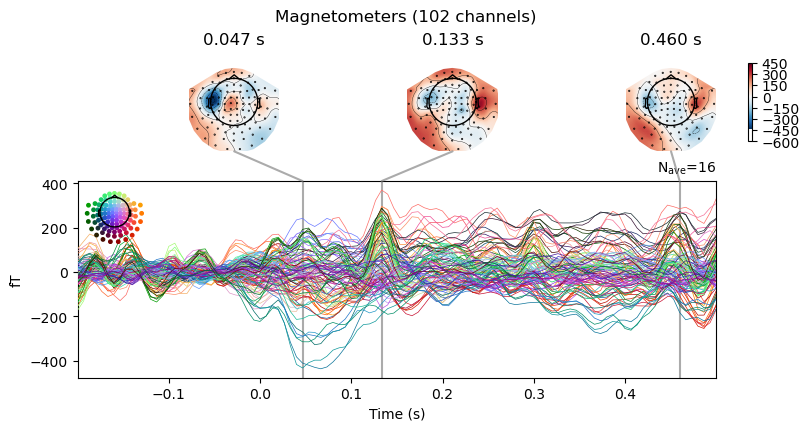

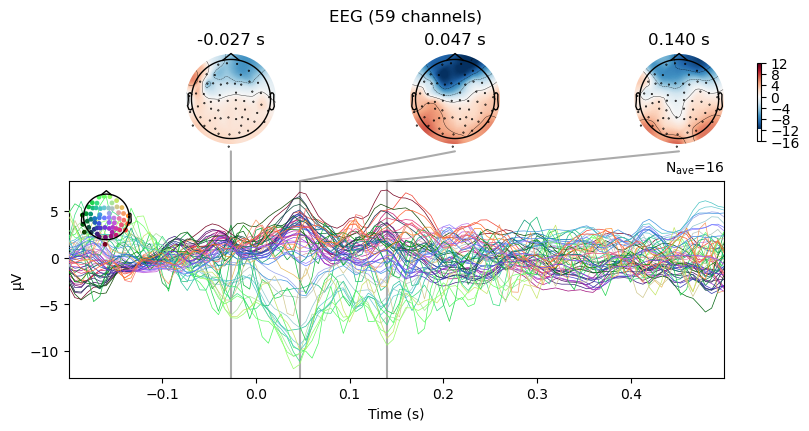

In [29]:
target.plot_joint();
#Can do specified times as well

In [30]:
#mne.combine_evoked can show differences between two conditions. plot_compare_evokeds can also plot two 
#different conditions in time series like graph

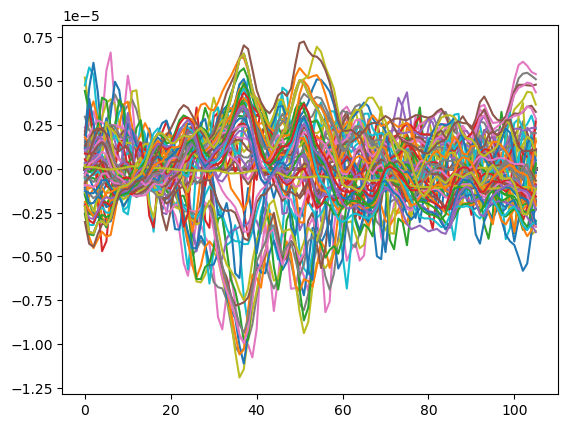

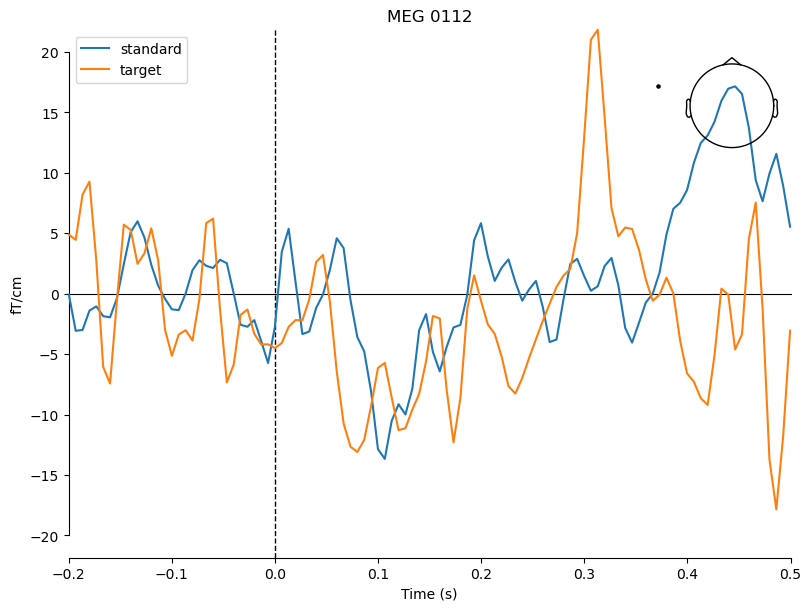

[<Figure size 800x600 with 2 Axes>]

In [71]:
mne.viz.plot_compare_evokeds({"standard": standard, "target": target}, picks = [1])

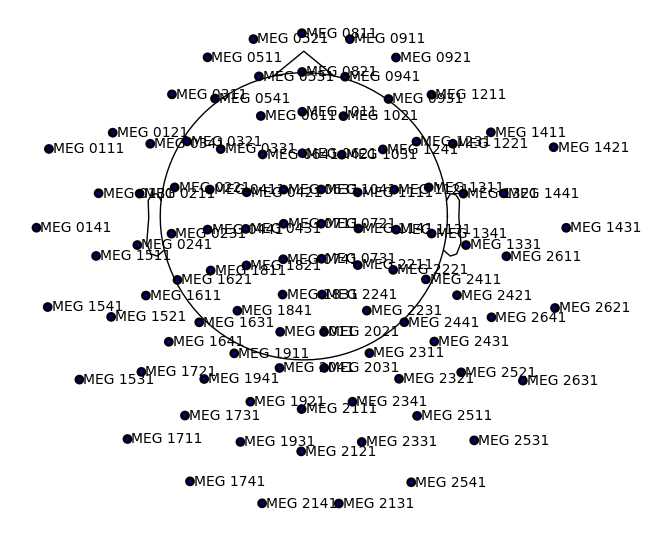

In [41]:
target.plot_sensors(show_names = True);

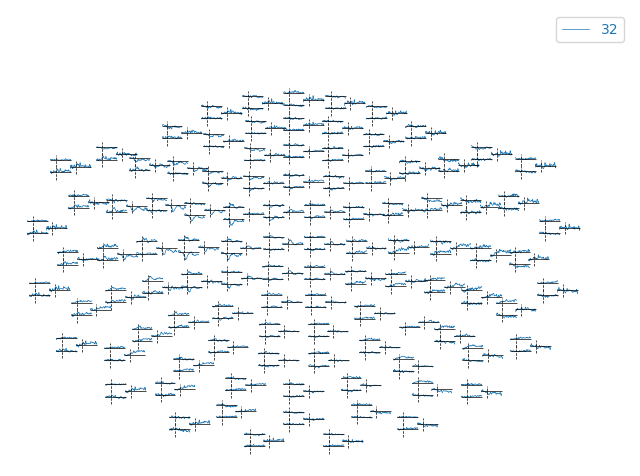

In [42]:
target.plot_topo();

In [54]:
x = target.data

In [44]:
ch_names = target.info['ch_names']

In [45]:
ch_names

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [46]:
channel = "EEG 044"
chIndex = [i for i, j in enumerate(ch_names) if j == channel]

In [64]:
plt.pyplot.plot(x[chIndex[0], :])

In [65]:
#Time-Frequency Things

In [67]:
epochs_for_tfr = mne.read_epochs(sample_data_raw_file)

Reading /Users/anshulchiranth/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle


/var/folders/q2/pyrq5k_s7gz_4v527qy_7lcc0000gn/T/ipykernel_17230/303678286.py:1: RuntimeWarning: This filename (/Users/anshulchiranth/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_for_tfr = mne.read_epochs(sample_data_raw_file)


ValueError: Could not find event data

In [68]:
#Power spectral density with plot_psd. Can define minimum and maximum frequency range. specific mne.time_frequency module

In [70]:
mne.time_frequency?